In [294]:
# Importo las librerias que usare en este notebook
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


### Tamano de figuras

In [ ]:

# Tamano de graficas, modificalo de ser necesario
sns.set(rc={'figure.figsize':(16,6)})

# Seccion 1

### Repasemos algunas propiedades de los estadisticos
Si lo deseas puedes reviar la documentacion de Numpy y ver las caracteristicas de la funcion normal: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [295]:
def statistics(x):
  print('Media Muestral: ',x.mean())
  print('Varianza Muestral: ',x.var())

In [296]:
# Crear la semilla
np.random.seed(3245)
n= 1000
# x~Normal(0,1)
x = np.random.normal(loc=0, scale=1, size=n)
print('Normal(0,1)')
statistics(x)


Normal(0,1)
Media Muestral:  0.006479187983895233
Varianza Muestral:  0.9956471749641369


#### Que pasa si multiplicamos x por una constante C?
Te recomendamos jugar en este laboratorio con las constante, y ver que pasa con los estadisticos.

In [297]:
print('C = 10')
statistics(10*x)

print()
print('C = -1')
statistics(-1*x)

print()
print('C = 0')
statistics(0*x)

C = 10
Media Muestral:  0.06479187983895232
Varianza Muestral:  99.56471749641368

C = -1
Media Muestral:  -0.006479187983895233
Varianza Muestral:  0.9956471749641369

C = 0
Media Muestral:  0.0
Varianza Muestral:  0.0


### Que pasa si x es igual a una constante?


In [298]:
print(' x = constante')
statistics(np.array([100]*1000))


print(' x = constante')
statistics(np.array([-1]*1000))

 x = constante
Media Muestral:  100.0
Varianza Muestral:  0.0
 x = constante
Media Muestral:  -1.0
Varianza Muestral:  0.0


Una varianza igual a cero implica que la variable es una constante?

La respuesta es si!

### Observemos que pasa con los boxplots cuando multiplicamos por una constante a x

Boxplot Normal(0,1)


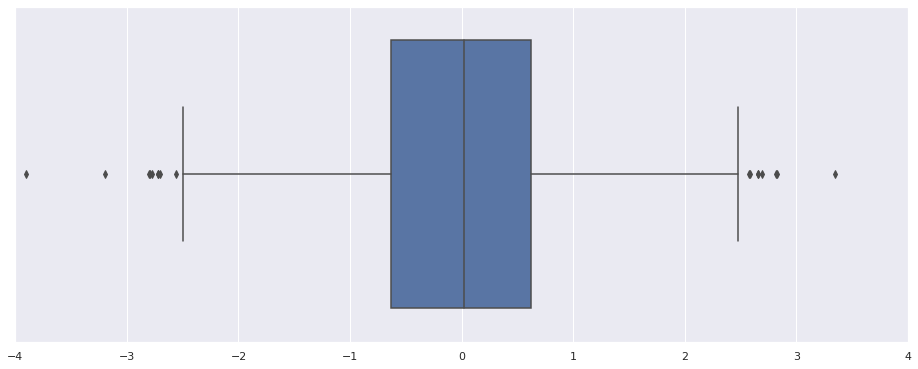

In [299]:
print('Boxplot Normal(0,1)')
sns.boxplot(x)

Boxplot Normal(0,10)


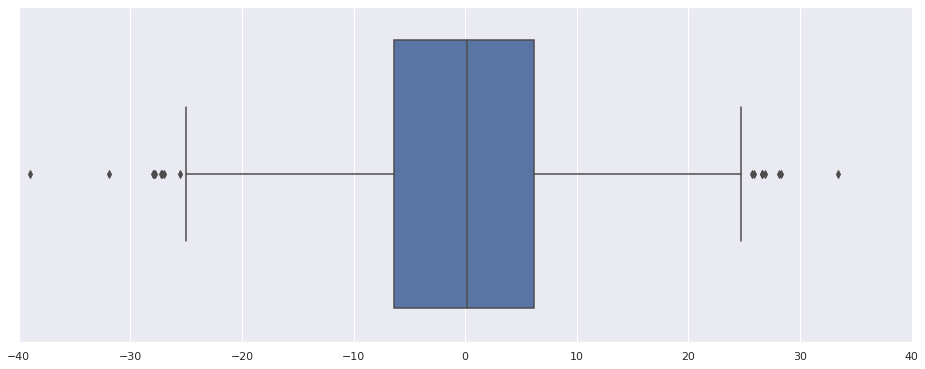

In [300]:
print('Boxplot Normal(0,10)')
sns.boxplot(x*10)

Boxplot Normal(0,.1)


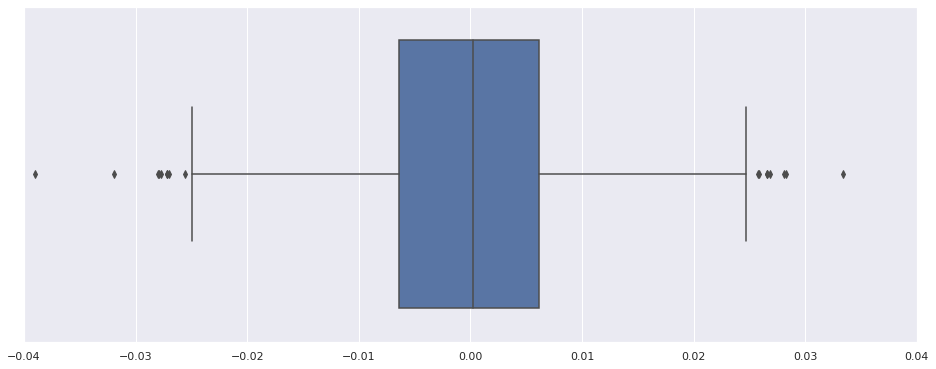

In [301]:
print('Boxplot Normal(0,.1)')
sns.boxplot(x*.01)

Boxplot Normal(-10,1)


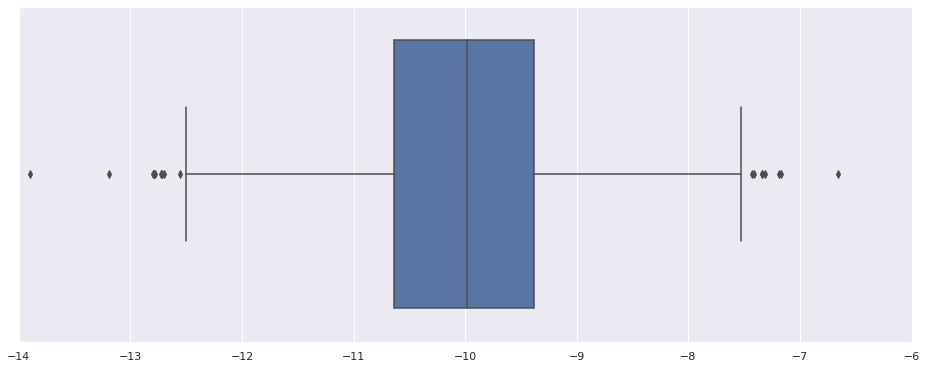

In [302]:
print('Boxplot Normal(-10,1)')
sns.boxplot(x-10)

### Que pasa con el boxplot si aplicamos una transformacion (una funcion) a x?

Piensalo detenidamente. La forma del boxplot cambiara?

Sqrt(x)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


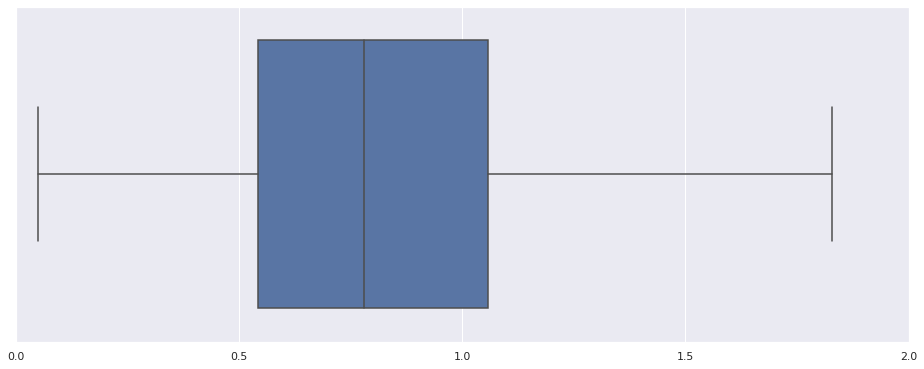

In [303]:
print('Sqrt(x)')
sns.boxplot(np.sqrt(x))

x^2


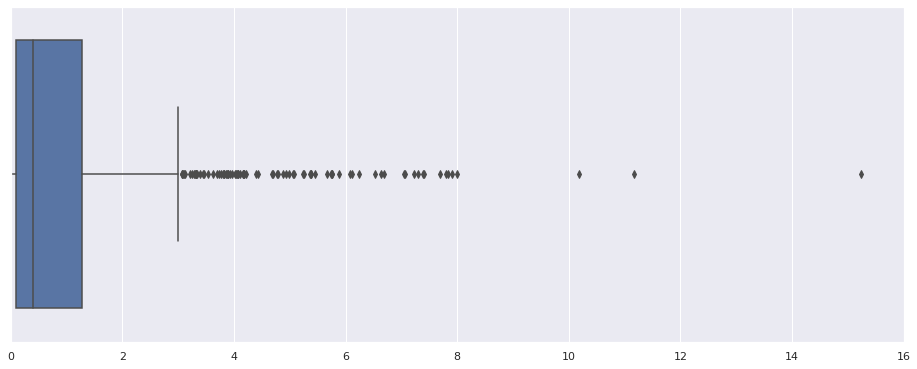

In [304]:
print('x^2')
sns.boxplot(np.power(x,2))

x^3


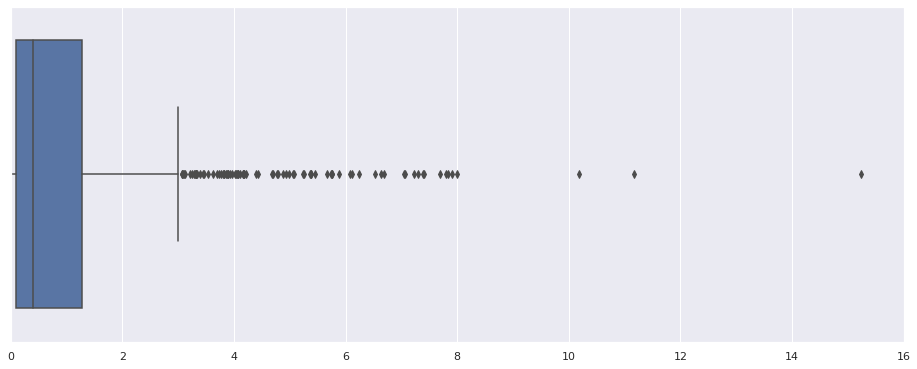

In [305]:
print('x^3')
sns.boxplot(np.power(x,2))

log(|x|)


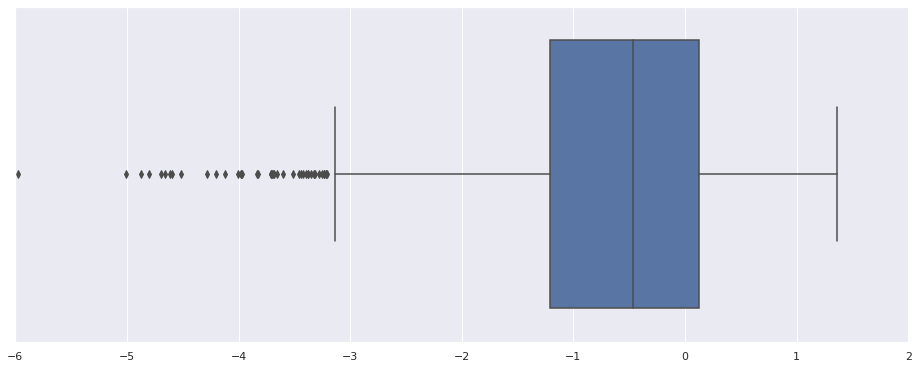

In [306]:
print('log(|x|)')
sns.boxplot(np.log(np.abs(x)))

#### Como puedes observar, las transformaciones funcionales de la variable x alteran la forma de los boxplots. Existen ocasiones donde es conveniente visualizar nuestras variables bajo diferentes transformaciones. En especial cuando creamos nuevas variables.

### Observemos que pasa con la variable y ~ N(10,10)

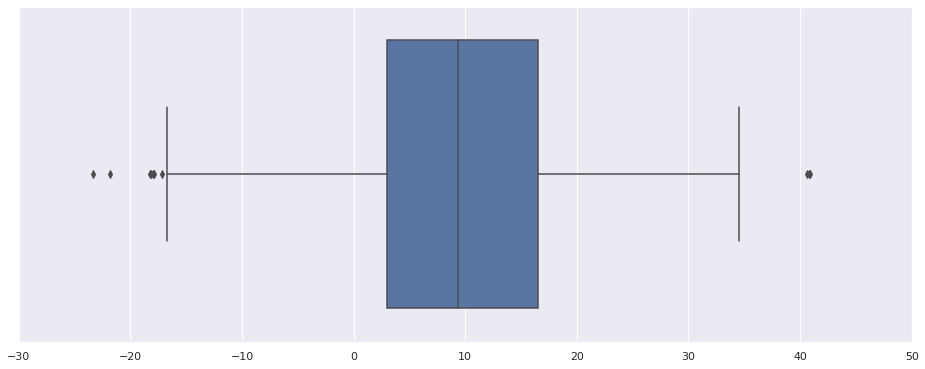

In [307]:
# Crear la semilla
np.random.seed(32445)
# y~Normal(10,10)
y = np.random.normal(loc=10, scale=10, size=n)

sns.boxplot(y)

#### Que pasa si a y le restamos su media, y la dividimos entre su std?

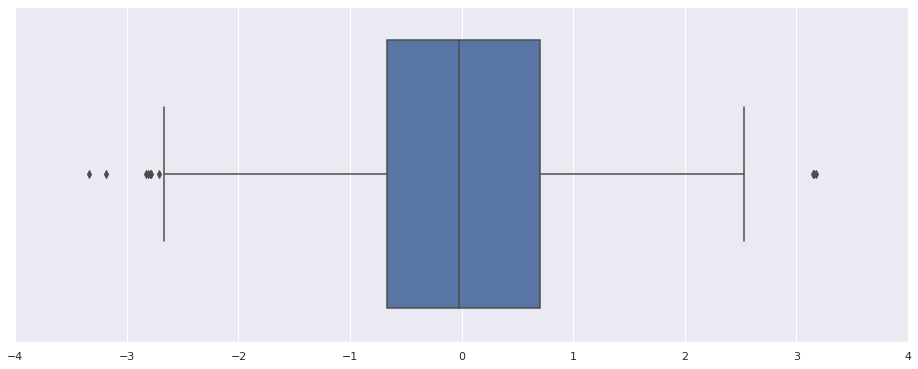

In [308]:
# Y normalizada
sns.boxplot((y-np.mean(y))/np.std(y))

Que pasa si aumentamos la varianza, pero dejamos constante la media?


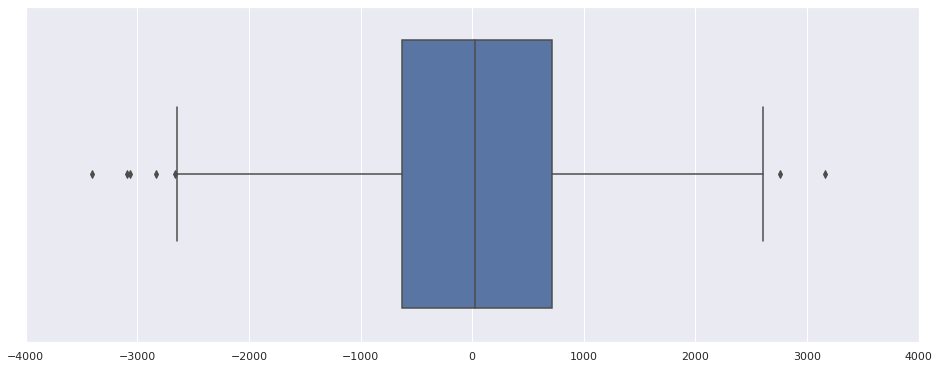

In [309]:
np.random.seed(4245)
# z~Normal(10,1000)
z = np.random.normal(loc=10, scale=1000, size=n)
sns.boxplot(z)

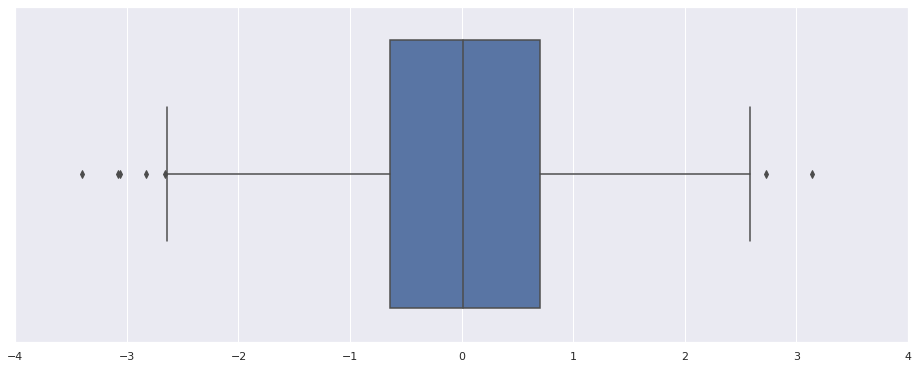

In [310]:
# Z normalizada
sns.boxplot((z-np.mean(z))/np.std(z))

Como puedes observar, la forma del boxplot no se ve demasiado alterada cuando restamos la media y dividimos la variable entre su std. Aunque, la escala si se ve alterada.

#### Pero, que pasa si la variable no se distribuye normal?


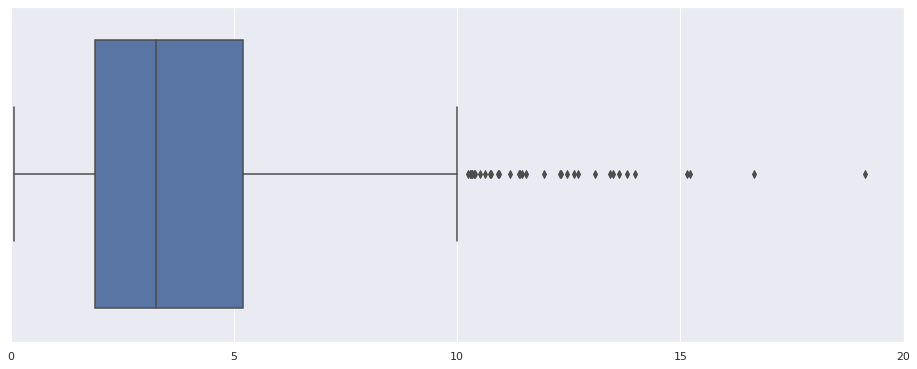

In [311]:
np.random.seed(987)
w = np.random.chisquare(4,n)
sns.boxplot(w)

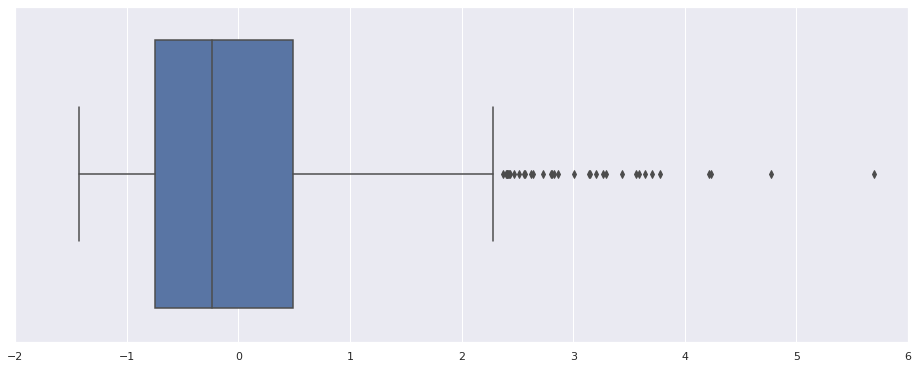

In [312]:
sns.boxplot((w-np.mean(w))/np.std(w))

Parece que la forma del boxplot no se ve alterada sustancialmente. Si lo piensas detenidamente, unicamente estamos restando una constante, y luego multiplicamos por otra.

## Existen muchas transformaciones que podemos aplicar a nuestras variables. Si tienes duda de que podria pasar, te recomendamos jugar/graficar para obetener intuicion.


# Seccion 2

### En esta seccion utilizaremos el metodo .distplot de seaborn. Si tienes dudas revidsa su documentacion.

Si deseas conocer mas de los histogramas te recomendamos revisar:
https://chartio.com/learn/charts/histogram-complete-guide/


X ~ N(0,1)


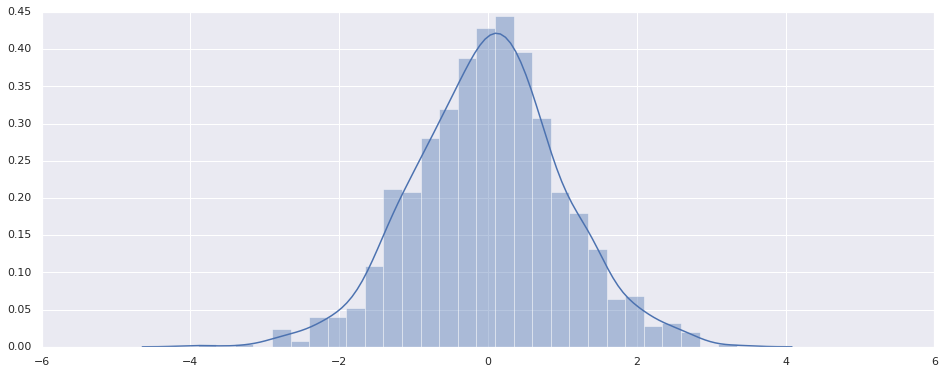

In [313]:
print('X ~ N(0,1)')
sns.distplot(x)

X ~ N(0,10)


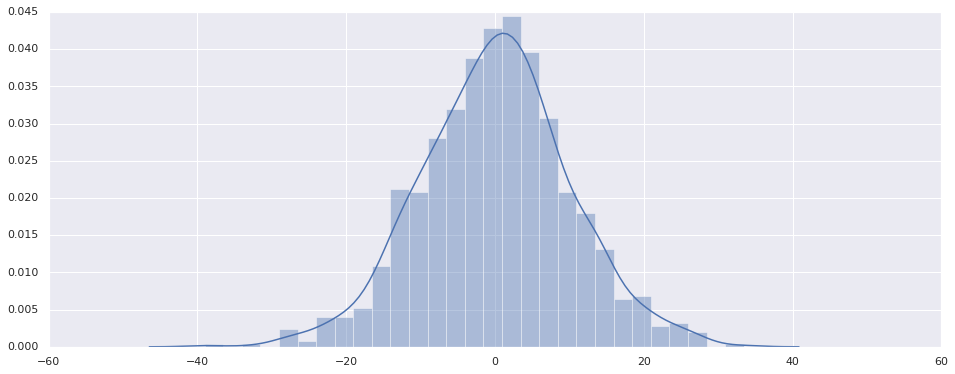

In [314]:
print('X ~ N(0,10)')
sns.distplot(x*10)

X ~ N(-10,1)


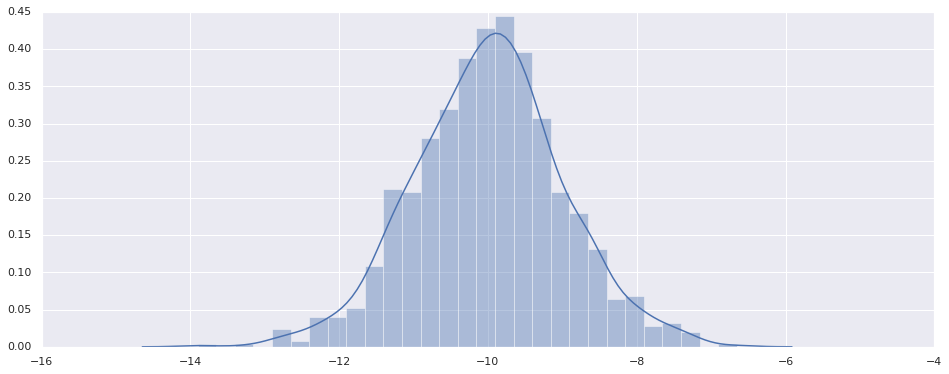

In [315]:
print('X ~ N(-10,1)')
sns.distplot(x - 10)

W ~ Chi(4)


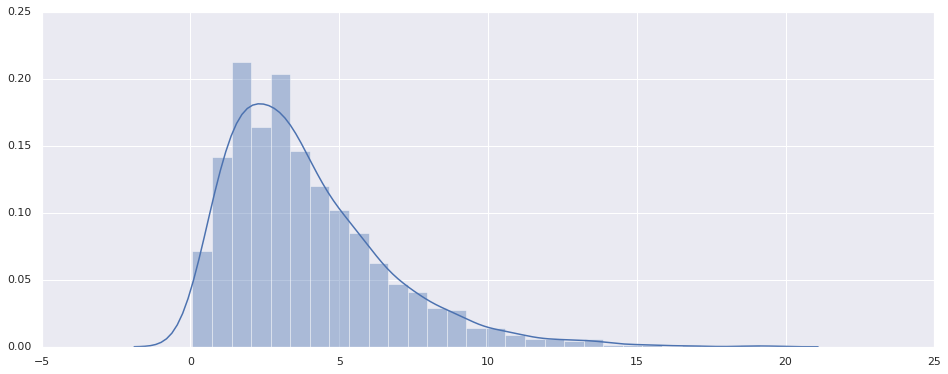

In [316]:
print('W ~ Chi(4)')
sns.distplot(w)

### Ahora modifiquemos el numero de bins


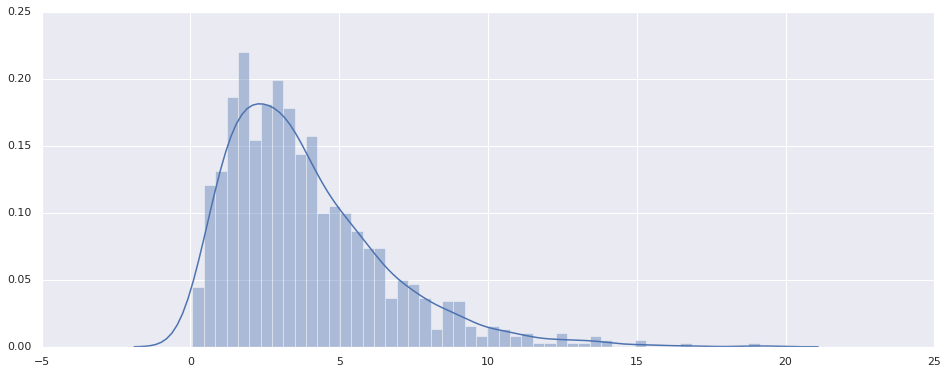

In [326]:
# Mas bins
sns.distplot(w, bins=50)

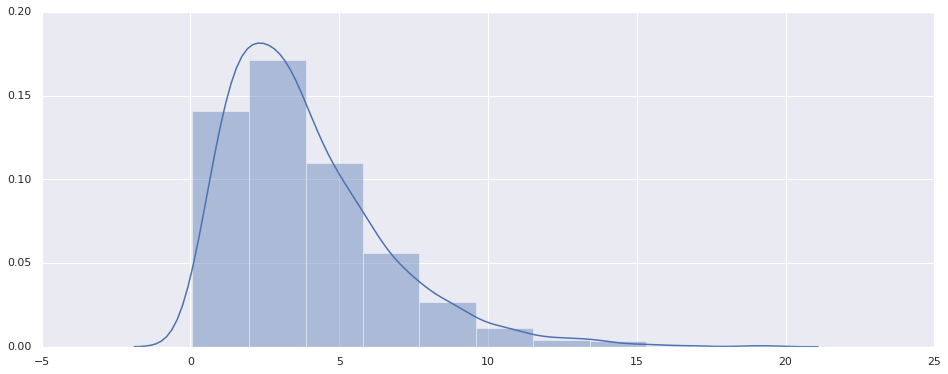

In [327]:
# Menos bins
sns.distplot(w, bins=10)

### A continuacion presentamos dos funciones que te seran de gran ayuda para entender mejor los conceptos. Te recomendamos jugar un poco con ellas para entender mejor como se modifican las visualizaciones ante transformaciones de las variables.

In [317]:
def plots(x):
  '''
  Grafica boxplot e histogramas 
  '''
  fig, ax =plt.subplots(1,2)
  sns.boxplot(x, ax=ax[0])
  sns.distplot(x, ax=ax[1])
  fig.show()

In [318]:
def normalize(x):
  '''
  Normaliza la variable
  '''
  return (x- np.mean(x))/np.std(x)

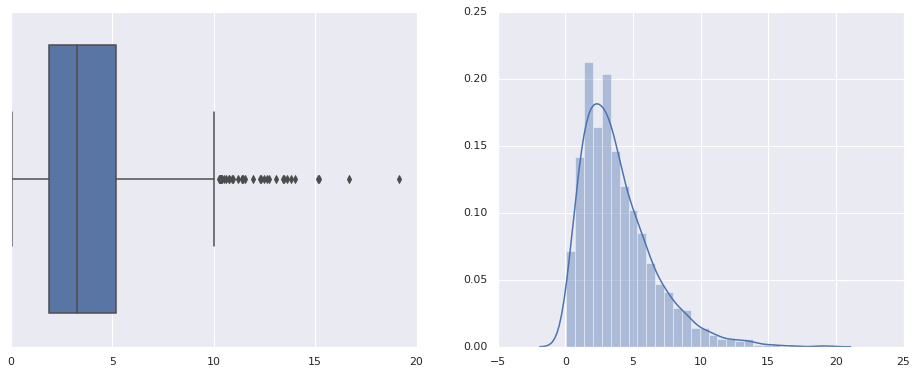

In [319]:
# W ~ Chi(4)
plots(w)

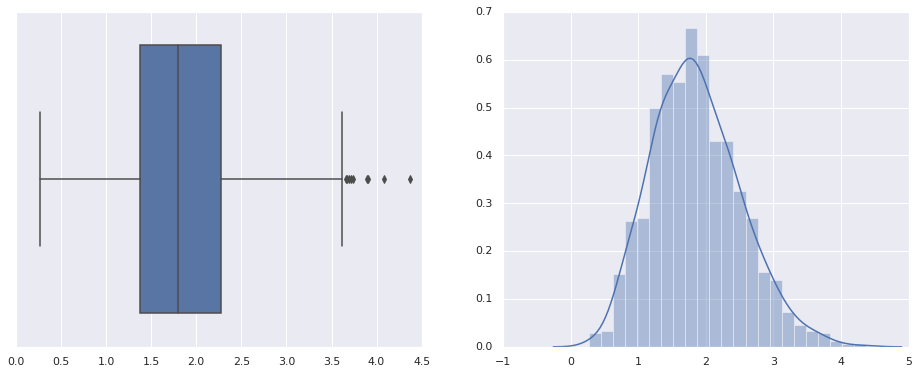

In [320]:
# Sqrt(w)
plots(np.power(w,.5))

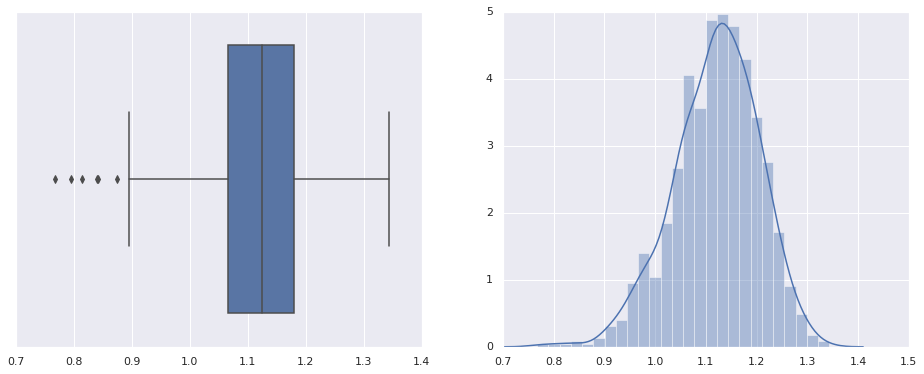

In [321]:
# W^.1
plots(np.power(w,.1))

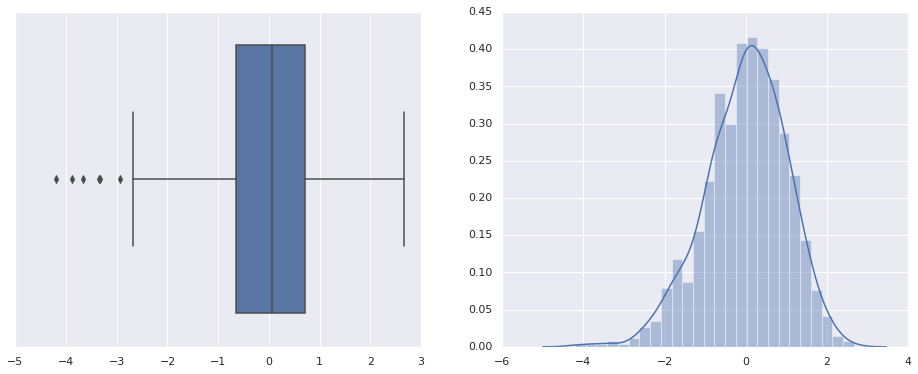

In [325]:
# W^.1 normalizado
plots(normalize(np.power(w,.1)))

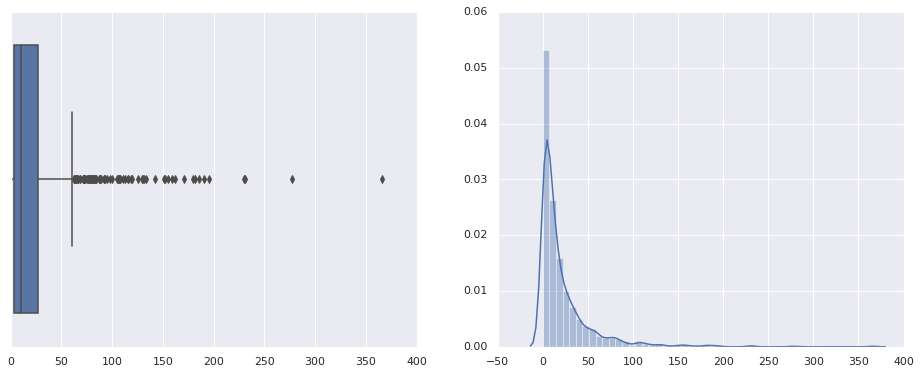

In [323]:
# W ^ 2
plots(np.power(w,2))

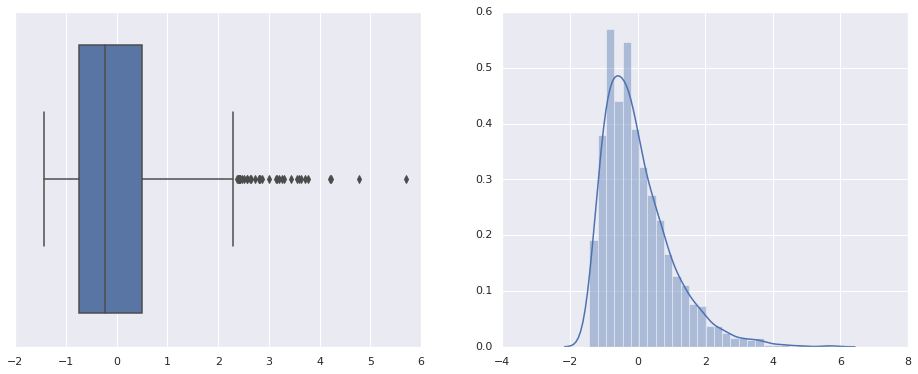

In [324]:
# W normalizado
plots(normalize(w))

# Seccion 3

Si deseas conocer mas sobre como utilizar los histogramas en un pipeline de datos te recomendamos ver: https://statisticsbyjim.com/basics/histograms/

Carguemos los datos de iris desde seaborn. Podriamos explicarte que contiene cada columna, pero preferimos delegarlo! Es importante obtener skills de busqueda e intuicion!




In [329]:
iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [330]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [332]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Por ahora concentremonos en analizar el largo de los sepales "sepal_length" por especie. Hagamos uso del groupby de pandas y el metodo describe.

In [340]:
# Observemos algunos estadisticos condicionales
iris[['species', 'sepal_length']].groupby('species').describe()

sepal_length                                            
                  count   mean       std  min    25%  50%  75%  max
species                                                            
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

Parece que cada especie se comporta un poco diferente.  
1 Observa la media  
2 Observa la varianza  
3 Observa los cuantiles  

Parece que valdria la pena visualizarlo con boxplots e histogramas


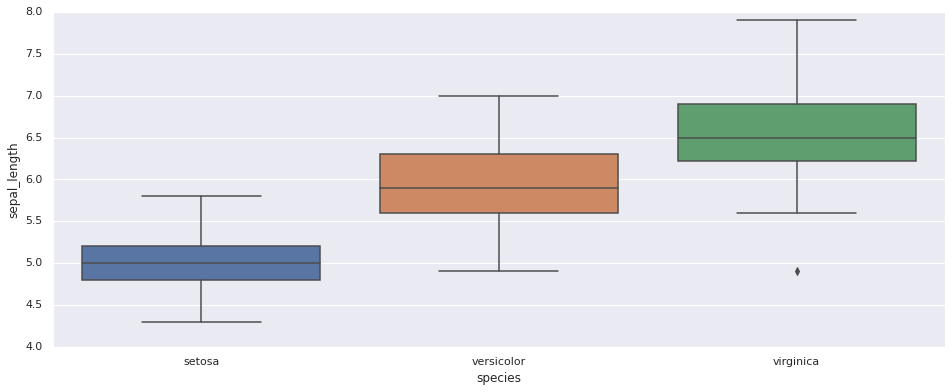

In [335]:
# Sepal Length Boxplot
sns.boxplot(data=iris, x='species', y='d')

Parece existir una diferencia clara en el tamano de los "sepalos". Talvez convenga validarlo con un histograma. Para ellos haremos uso de:

### Facetgrid:
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

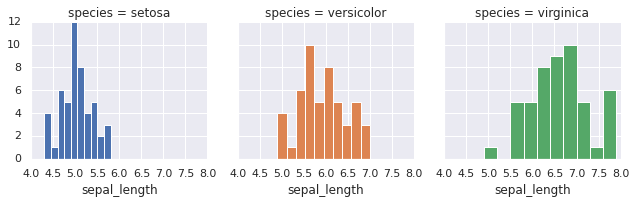

In [338]:
# Veamos los histogramas en column
g = sns.FacetGrid(iris, col="species", hue='species')
g = g.map(plt.hist, "sepal_length")

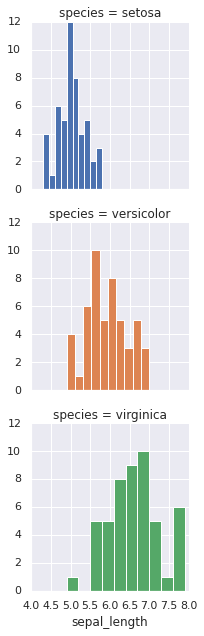

In [341]:
# Veamos los histogramas en row
g = sns.FacetGrid(iris, row="species", hue='species')
g = g.map(plt.hist, "sepal_length")

Parece que efectivamente que las distribuciones de cada especie son diferentes.

# Tarea

Repite el analisis para las demas variables, pensando que tu objetivo es predecir el tipo de especie que es cierta observacion apartir del largo y ancho de los sepalos y petalos.

Si tienes dudas consulta el codigo de este notebook y la documentacion de seaborn. Nos vemos pronto!